In [10]:
!pip install hdbscan

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
from sklearn.metrics.pairwise import pairwise_distances

In [4]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import hdbscan
from sklearn import metrics

In [6]:
# algorithms = ["auto", "ball_tree", "kd_tree", "brute"] 
# leaf_size = [10, 20, 30, 40, 50] 
eps = [0.4, 0.5, 0.6, 0.7, 0.8] #cluster_selection_epsilon parameter for hdbscan
metrics = ["precomputed", "euclidean","manhattan"]
min_samples =  [100, 200, 300, 400, 500] #is it worth it to use the min_sample from DBSCAN and cache using memory?
min_cluster_size = [100, 200, 300, 400, 500]
#cluster_selection_methods=["eom", "leaf"]

In [7]:
def grid_search(logs, gram, min_df):
    
    labels_ = log_labels
            
    X = get_features(logs, gram, min_df)
    X = X.toarray()

    idxs = np.where(np.all(X == 0, axis=1))

    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)

    result_header = ["Eps", "Min Cluster Size", "Min Sample Size", "Metric", "VMeasure", "Fowlkes-Mallows", "Labels"]
    results = []
    
    Y = pairwise_distances(X, metric="cosine")
    
    #using min sample = 100 based off of dbscan results
    
    for metric in metrics:
        for min_cl in min_cluster_size:
            for min_s in min_samples:
                for ep in eps:
                        model = hdbscan.HDBSCAN(min_cluster_size=min_cl,min_samples=min_s,cluster_selection_epsilon=0.5,
                                                metric=metric,algorithm='best')

                        if metric == "precomputed":
                            model.fit(Y)
                        else :
                            model.fit(X)

                        labels = model.labels_

                        vm = evaluate_vmeasure(labels_, labels)
                        fm = evaluate_fm(labels_, labels)

                        lst1 = set(labels)

                        result = [0.5, min_cl, min_s, metric, vm, fm, len(lst1)-1]
                        results.append(result)

                        tab_results(result_header, results) 

                
    tab_results(result_header, results)         

In [18]:
grid_search(logs, 2, 70)

MemoryError: Unable to allocate 5.47 GiB for an array with shape (27093, 27093) and data type float64

In [ ]:
grid_search(logs, 3, 90)

## Bigram Feature Vectorizer

In [19]:
eval_results = []

In [20]:
labels_ = log_labels

X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [21]:
model = hdbscan.HDBSCAN(min_cluster_size=500,min_samples=100,cluster_selection_epsilon=0.5,
                                        metric="euclidean",algorithm='best')
model.fit(X)

HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=500, min_samples=100)

In [22]:
labels = model.labels_

In [23]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

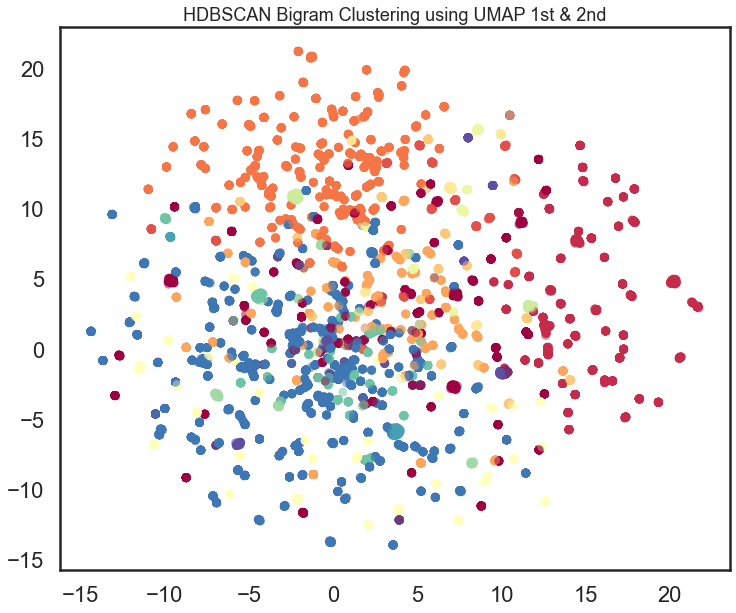

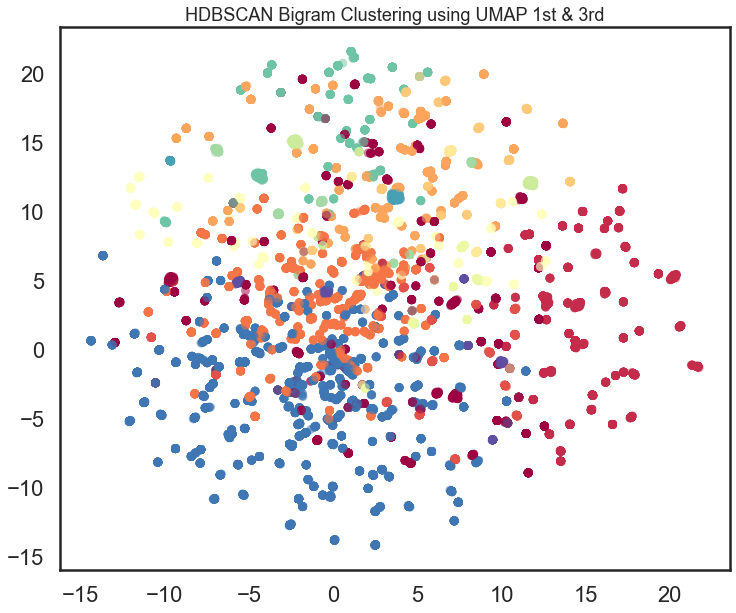

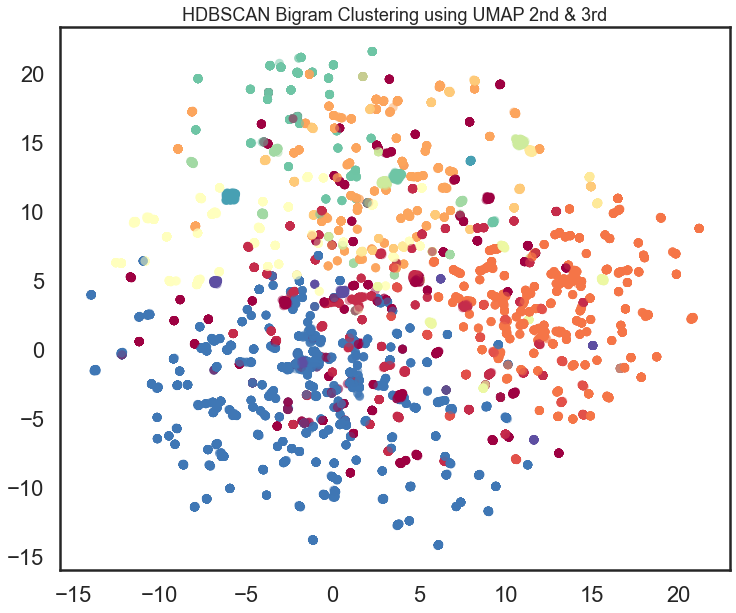

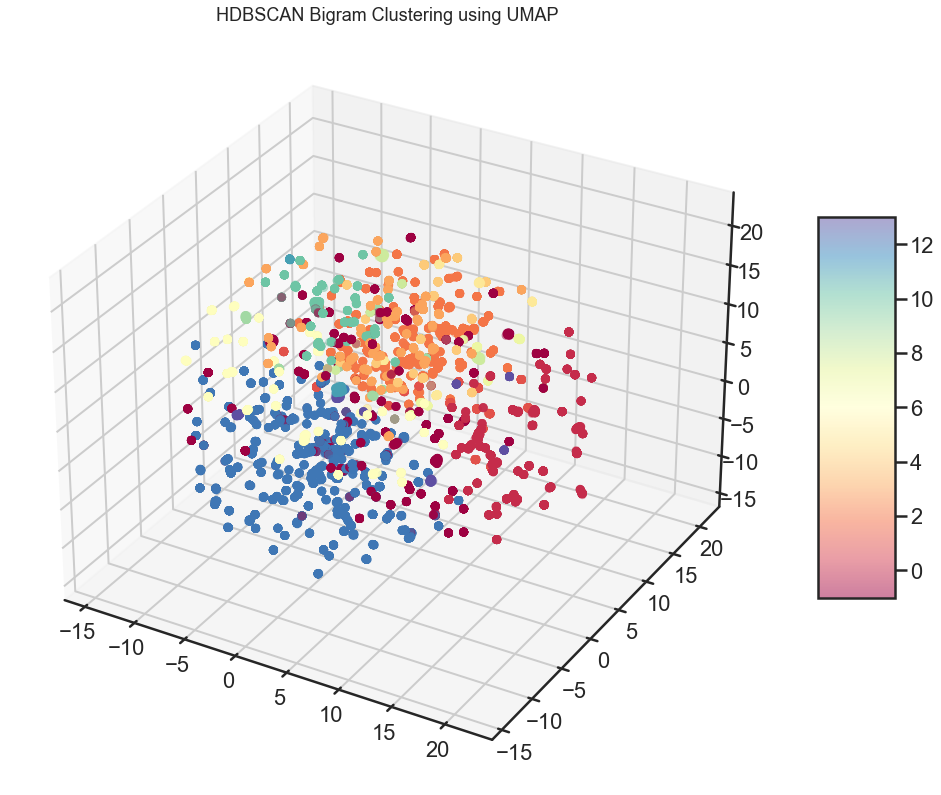

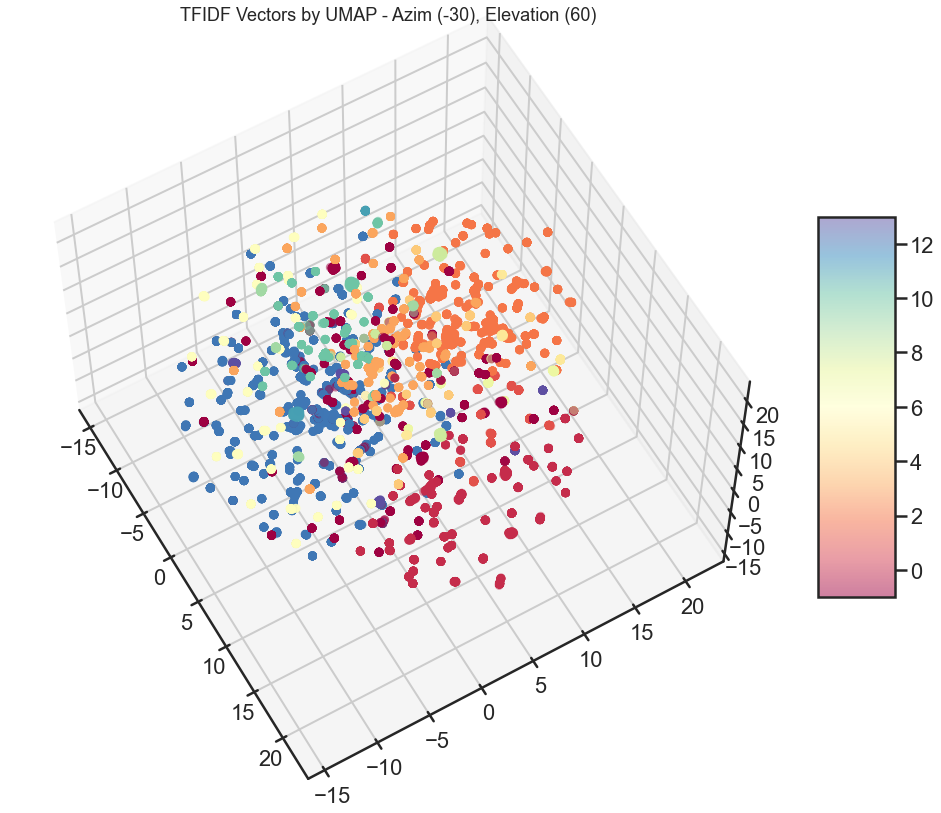

In [24]:
plot_clusters("HDBSCAN Bigram Clustering using UMAP", X, labels)

In [25]:
results = evaluate_clustering('HDBSCAN Bigram Clustering', X, labels_, labels)
print(results)

['HDBSCAN Bigram Clustering', '0.79', '0.75', '0.77', '0.55', '0.77', '0.60']


In [26]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [8]:
labels_ = log_labels

In [9]:
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [10]:
 Y = pairwise_distances(X, metric="cosine")

In [ ]:
model = hdbscan.HDBSCAN(min_cluster_size=500,min_samples=100,cluster_selection_epsilon=0.5,
                                        metric="precomputed",algorithm='best')
model.fit(Y)

In [ ]:
labels = model.labels_

In [ ]:
lst1 = set(labels)
lst1

In [ ]:
plot_clusters("HDBSCAN Trigram Clustering using UMAP - Min S 100", X, labels)

In [ ]:
results = evaluate_clustering('HDBSCAN Trigram Clustering - Min S 100', X, labels_, labels)
print(results)

In [ ]:
eval_results.append(results)

In [ ]:
model.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [ ]:
model.condensed_tree_.plot()